In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
N=20
lattice=np.ones((N,N,N))
T=10
beta=1./T

def total_energy():
    global lattice
    return -sum(sum(lattice*(np.roll(lattice,1,axis=1)+np.roll(lattice,-1,axis=1)+np.roll(lattice,1,axis=0)+np.roll(lattice,-1,axis=0)+np.roll(lattice,-1,axis=2)+np.roll(lattice,1,axis=2))))

def block_energy(i,j,k):
    global lattice
    global N
    return -(lattice[i,j,k]*(lattice[(i-1)%N,j,k]+lattice[(i+1)%N,j,k]+lattice[i,(j+1)%N,k]+lattice[i,(j-1)%N,k] + lattice[i,j,(k+1)%N] + lattice[i,j,(k-1)%N]))


def flipone():
    global lattice
    global beta
    global N
    # Pick a random site
    nx, ny, nz= np.random.randint(0,N),np.random.randint(0,N), np.random.randint(0,N)
    # Calculate current energy of site and neighbors
    en_i=block_energy(nx,ny,nz)
    # If it were flipped
    en_f=-en_i
    if en_f < en_i: # This could be simplified
        lattice[nx,ny,nz]*=-1
    elif np.random.random() < min(1,np.exp(-beta*(en_f-en_i))):
        lattice[nx,ny,nz]*=-1
        
def magnetization():
    global lattice
    global N
    return sum(sum(lattice))/N**3

In [36]:
magnetizaciones=[]
lattice=np.ones((N,N,N))
numIter=100*N**2
for temp in np.linspace(0.1,8,40):
    T=temp
    beta=1./T
    mag=[]
    for i in range(numIter):
        flipone()
        if i>numIter-100:
            mag.append(magnetization())
    magnetizaciones.append([T,np.mean(mag)])
magnetizaciones=np.array(magnetizaciones)

In [43]:
losX=[]
t = linspace(0,8,100)
for __ in range(len(t)):
    losX.append(0)
print(len(t), len(losX))

100 100


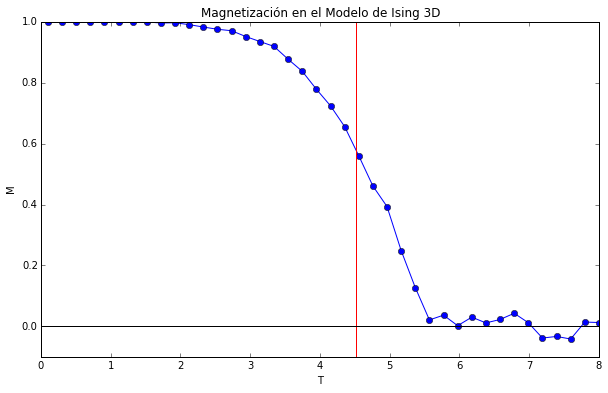

In [45]:
plt.figure(figsize=(10,6))
plt.plot(magnetizaciones[:,0],magnetizaciones[:,1], "o-")
plt.xlabel("T")
plt.ylabel("M")
ylim(-0.1,1)
plt.title(u"Magnetización en el Modelo de Ising 3D") 
plt.axvline(4.51, color='red')
plt.plot(t,losX, color = "Black")
plt.show()